<a href="https://colab.research.google.com/github/Raghulll/python_projects/blob/main/FACE_MASK_DETECTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


IMPORTING DEPENDENCIES

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_303.jpg', 'with_mask_1607.jpg', 'with_mask_1194.jpg', 'with_mask_769.jpg', 'with_mask_2873.jpg']
['with_mask_14.jpg', 'with_mask_1507.jpg', 'with_mask_554.jpg', 'with_mask_802.jpg', 'with_mask_1034.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1267.jpg', 'without_mask_2035.jpg', 'without_mask_1273.jpg', 'without_mask_1900.jpg', 'without_mask_472.jpg']
['without_mask_2248.jpg', 'without_mask_1838.jpg', 'without_mask_2431.jpg', 'without_mask_285.jpg', 'without_mask_855.jpg']


In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [12]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

print(len(with_mask_labels))
print(len(without_mask_labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


DISPLAYING IMAGES

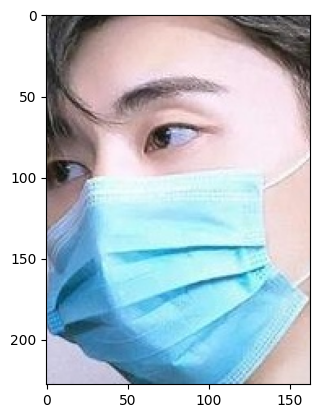

In [15]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

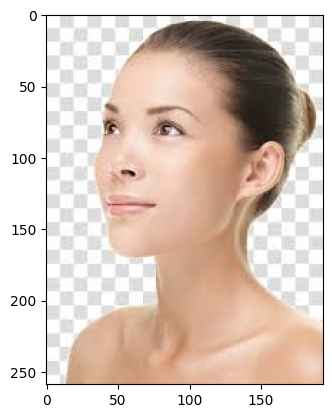

In [16]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

RESIZING THE IMAGES

In [17]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
data[0]

array([[[42, 44, 43],
        [45, 47, 46],
        [47, 49, 48],
        ...,
        [73, 68, 82],
        [73, 67, 81],
        [74, 68, 82]],

       [[45, 47, 46],
        [48, 50, 49],
        [49, 51, 50],
        ...,
        [74, 70, 84],
        [76, 71, 85],
        [76, 71, 85]],

       [[39, 41, 40],
        [46, 48, 47],
        [52, 54, 53],
        ...,
        [76, 73, 87],
        [79, 76, 90],
        [78, 76, 89]],

       ...,

       [[41, 45, 44],
        [50, 54, 53],
        [38, 42, 41],
        ...,
        [62, 70, 72],
        [55, 61, 64],
        [47, 53, 56]],

       [[50, 54, 53],
        [43, 47, 47],
        [41, 45, 44],
        ...,
        [60, 66, 66],
        [52, 56, 58],
        [48, 52, 53]],

       [[48, 53, 51],
        [39, 43, 41],
        [42, 44, 42],
        ...,
        [55, 58, 62],
        [47, 47, 52],
        [45, 45, 49]]], dtype=uint8)

In [20]:
type(data[0])
data[0].shape

(128, 128, 3)

In [21]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [22]:
type(X)
type(Y)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)
print(Y)

(7553, 128, 128, 3)
(7553,)
[1 1 1 ... 0 0 0]


TRAINING TESTING SPLITTING


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [27]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [28]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 93, 112, 144],
        [ 92, 111, 142],
        [ 89, 108, 140],
        ...,
        [ 79,  98, 130],
        [ 79,  98, 130],
        [ 77,  96, 127]],

       [[ 91, 110, 142],
        [ 89, 108, 140],
        [ 87, 106, 138],
        ...,
        [ 79,  98, 130],
        [ 79,  98, 130],
        [ 77,  96, 126]],

       [[ 91, 110, 139],
        [ 90, 109, 139],
        [ 87, 106, 137],
        ...,
        [ 82,  99, 127],
        [ 82,  99, 127],
        [ 80,  98, 127]]

In [29]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.36470588, 0.43921569, 0.56470588],
        [0.36078431, 0.43529412, 0.55686275],
        [0.34901961, 0

CNN

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [32]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [33]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 23ms/step - loss: 0.4246 - acc: 0.8216 - val_loss: 0.2670 - val_acc: 0.8678
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2842 - acc: 0.8906 - val_loss: 0.2595 - val_acc: 0.8760
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2356 - acc: 0.9084 - val_loss: 0.2310 - val_acc: 0.8992
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1924 - acc: 0.9279 - val_loss: 0.2436 - val_acc: 0.9008
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1695 - acc: 0.9325 - val_loss: 0.1949 - val_acc: 0.9223


In [34]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2147 - acc: 0.9206
Test Accuracy = 0.9205824136734009


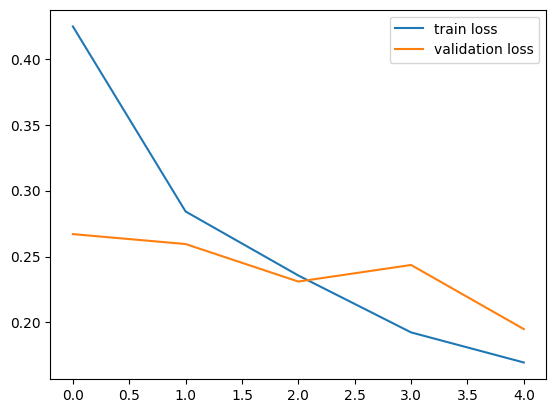

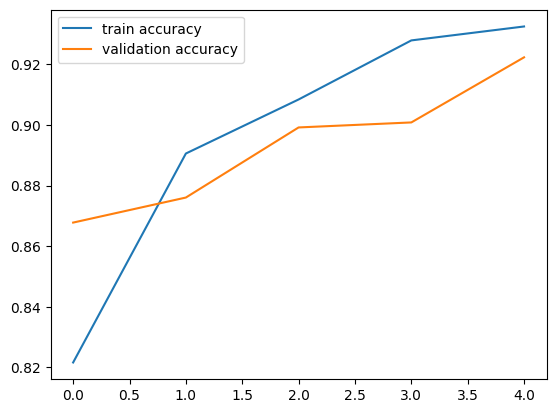

In [35]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

PREDICTIVE SYSTEM

Path of the image to be predicted: /content/th.jpeg


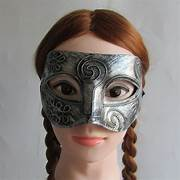

1/1 [==============================] - 0s 19ms/step
[[0.5483246  0.54305536]]
0
IVANGA MASK PODALA !


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('IVANGA MASK POTIRUKANGA !')

else:

  print('IVANGA MASK PODALA !')

Path of the image to be predicted: /content/woman-wearing-mask.original.jpg


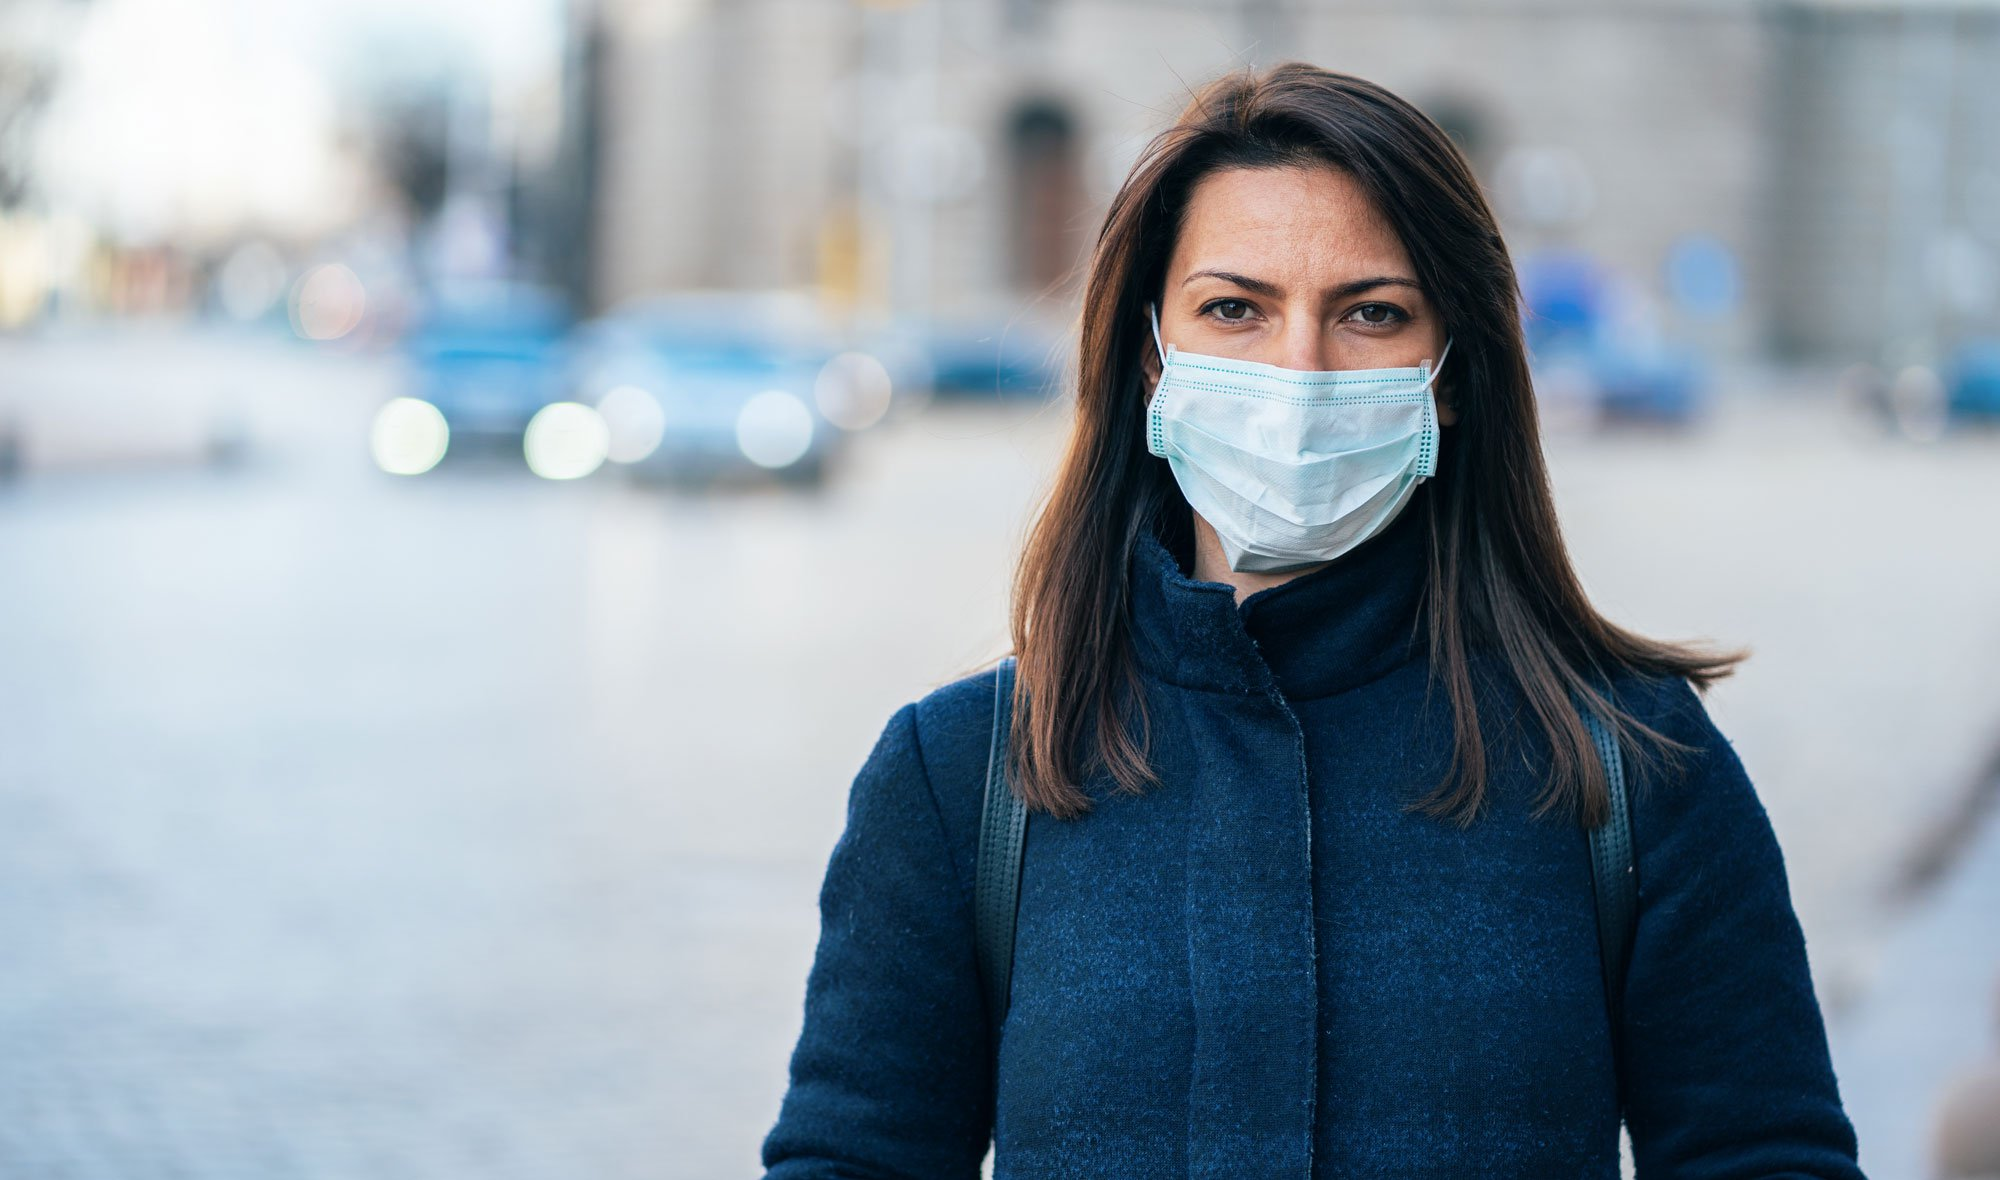

1/1 [==============================] - 0s 25ms/step
[[0.4645712 0.5220869]]
1
IVANGA MASK POTIRUKANGA !


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('IVANGA MASK POTIRUKANGA !')

else:

  print('IVANGA MASK PODALA !')